# ObsAstro - Quasar Spectroscopy

Written by Lea Ferellec /
Last Update: January 12, 2024 by Lea Ferellec /
Observational Astronomy - Computer Lab - University of Edinburgh


<div class="alert alert-block alert-warning">

# <font color='red'>WARNING!</font> 
Through this notebook, you should replace any <font color='red'>'''text'''</font> with your own file/variable names  




## Introduction 

In this exercise, you will reduce a 2D-spectrum of a quasar and extract a one 1D-spectrum out of it. You will then be able to measure the wavelengths of different emission peaks in the spectrum, and match these to theoretical quasar emissions to derive the redshift of the object. 

First, insert the paths to your different files in the `astropy.io.fits` commands below to load the fits files. We extract the image data as an array by adding `[0].data` to the command.

In [1]:
# These commands will allow your plots to open in interactive windows.
# If you are using your laptop, you might have to change "matplotlib.use('TkAgg')" to "%matplotlib" 
# or "%matplotlib notebook", then restart the kernel and run the cell again.
import matplotlib
%matplotlib inline

# import a number of useful python packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import obsastro_quasar_module as obs 



# Load the fits files using the astropy.io.fits package
image_quasar = fits.open('quasar.fits')[0].data
image_flatfield = fits.open('flatfield.fits')[0].data
image_arc = fits.open('arc.fits')[0].data

## Displaying the Spectra

The `obs` module has a `display_2d` function which plots an image with a "z-scale" brightness scale. This scale is useful for astronomical images where we want to see both bright and faint objects/features.

Use the `help` command to see how the `display_2d` function should be used, then use it with the appropriate inputs to display the three files that you have loaded. Read the lab manual for more details on what each image represents.

In [ ]:
help(obs.display_2d)
help()
print('hello')

Help on function display_2d in module obsastro_quasar_module:

display_2d(image_array, title)
    Function to display a 2D-image with z-scale brightness scaling.
    INPUTS:
        - image_array: np.array image to display
        - title: string to use as the title of your plot



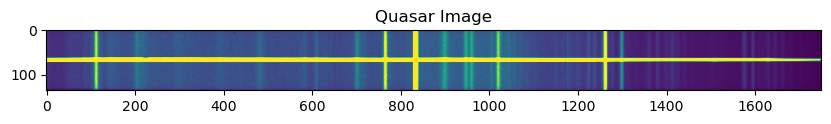

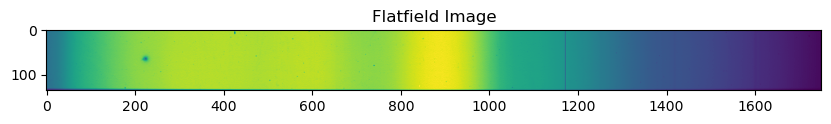

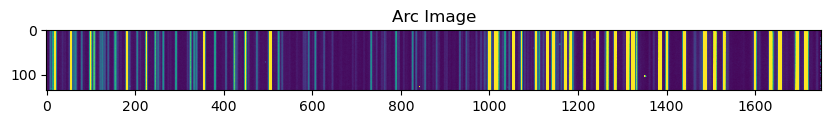

In [3]:
obs.display_2d(image_quasar,'Quasar Image') 
obs.display_2d(image_flatfield,'Flatfield Image') 
obs.display_2d(image_arc,'Arc Image') 

## Flat Fielding

The first correction that we need to apply is flat-fielding. The flat-filed image is a spectrum of a uniform light source and shows different effects affecting the flux received by each pixel, such as vignetting from the telescope, dust on optical surfaces, etc.

In the box below, create a `quasar_flat` object by dividing the quasar spectrum by the flat field.

In [4]:
quasar_flat = image_quasar / image_flatfield

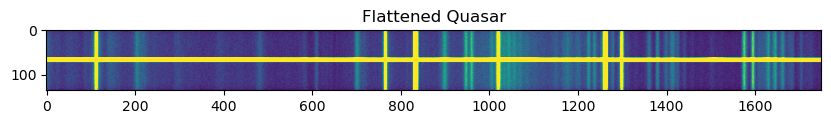

In [5]:
obs.display_2d(quasar_flat,'Flattened Quasar') 

## Sky Subtraction

On our flattened spectrum, the "trace" (the physical image of the quasar) is contaminated by emission lines from the sky (see figures in the lab manual). We need to remove this sky contribution. To do so, we will model the background areas surounding the trace by performing polynomial fits column-by-column. We will then subtract this model to the image. The background is calculated by the `background` function from our `obs` module.

By inspecting the quasar spectrum with `display_2d`, determine the values of `y1`, `y2`, `y3` and `y4` to delimit the areas of sky to fit. Create the `bkg` array representing the background, then calculte the sky-subtracted image `quasar_skysub`.

In [6]:
y1 = 0
y2 = 63
y3 = 73
y4 = 135

bkg = obs.background(quasar_flat, y1, y2, y3, y4)
quasar_skysub = quasar_flat - bkg

This should have removed most of the background. Some residuals might remain, which should not affect your data too much later on. You can check on the image that the brightnesses of the remaining lines are negligible compared to the quasar flux.

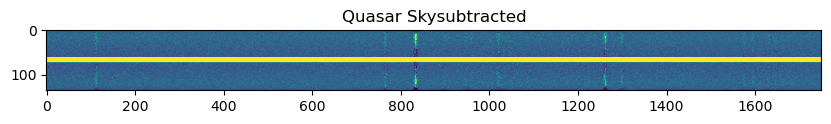

In [7]:
obs.display_2d(quasar_skysub, 'Quasar Skysubtracted') 

## Extracting the Quasar spectrum

We are now ready to turn the 2D-spectrum into a 1D-spectrum. This is done by adding up different rows containing the trace. 
Determine `y5` and `y6` so that the trace is contained between the rows `y5` to `y6`. You can leave a few pixels of background on each side (~5) , but adding too much background can increase the effect of potential residuals from the sky-subtraction. 
Using the method of your choice, create `quasar_spectrum` as the sum of the rows between `y5` and `y6`.
Plot the resulting spectrum, using appropriate axis labels.

In [8]:
y5 = 58
y6 = 78

quasar_spectrum = np.sum(quasar_skysub[y5:y6, :], axis = 0)

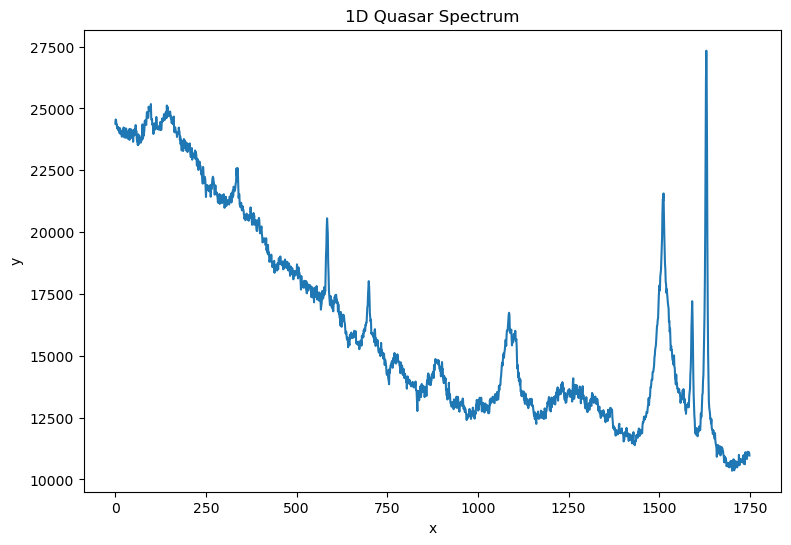

In [9]:
plt.figure(figsize=(9,6))
plt.plot(quasar_spectrum)
plt.title("1D Quasar Spectrum")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Wavelength Calibration

We now need to calibrate the spectral axis of the spectrum. For this, we will use the spectrum of a lamp obtained with the same instrumental setup. 

As for the quasar spectrum, create the spectrum of the arc lamp `arc_spectrum`, this time by adding up all the rows in the image. There is no need to apply any preliminary corrections like we did for the quasar spectrum.

In [10]:
arc_spectrum = np.sum(image_arc, axis = 0)

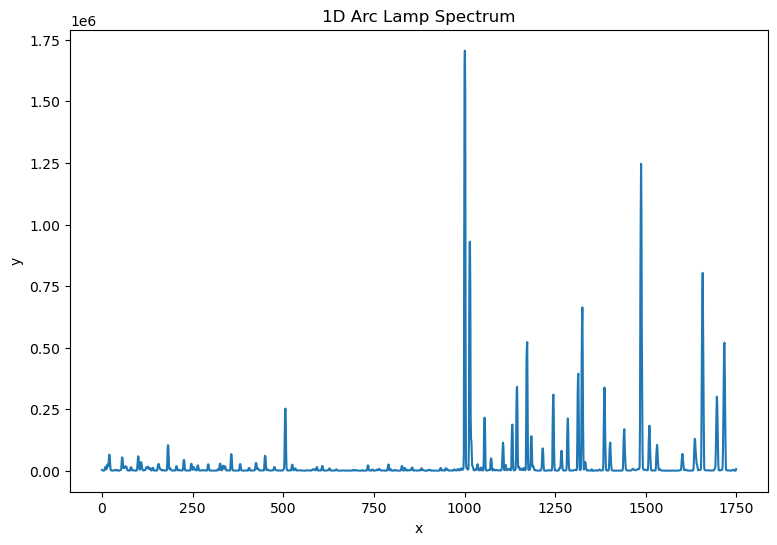

In [11]:
plt.figure(figsize=(9,6))
plt.plot(arc_spectrum)
plt.title("1D Arc Lamp Spectrum")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The appendix of the lab manual contains a few reference spectra of the same lamps, where the wavelengths of each emission line are indicated. On your spectrum, you will need to identify the wavelengths of **~15 lines selected more or less evenly across the spectrum**.

**Clue:** the bright line close to pixel number 500 is the 5015.675Å line and the bright line close to pixel number 1000 is the 5852.4878Å line. You should still look yourself for the precise pixel numbers for these lines.

**Warning:** the arc line at 6965.4300Å is mislabelled, do not use this one.

Create two lists `pix` and `wav` containing the x-coordinate of your lines (pix) and the corresponding wavelengths (wav).


In [12]:
all_pix = 20.20, 99.80, 122.72, 182.05, 226.13, 292.96, 323.99, 334.15, 339.05, 505.993, 1001.0, 1015.0, 1055.02, 1105.7, 1131.8, 1144.9, 1173.0, 1184.0, 1216.3, 1245.1, 1486.1, 1530.91, 1600.92, 1635.0, 1696.06, 1717.00
all_wav = 4277.5500, 4333.5600, 4371.3600, 4471.4770, 4545.0800, 4657.9400, 4713.1430, 4726.9100, 4735.9300, 5015.6750, 5852.4778, 5875.6180, 5944.8342, 6029.9971, 6074.3377, 6096.1630, 6143.0623, 6163.5939, 6217.2813, 6266.4950, 6678.200, 6752.8320, 6871.2900, 6971.4680, 7032.4127, 7065.1880

pix = 55.50, 99.80, 122.72, 182.05, 226.13, 292.96, 339.05, 505.993, 1001.0, 1055.02, 1131.8, 1144.9, 1184.0, 1216.3, 1245.1, 1486.1, 1530.91, 1600.92, 1635.0, 1696.06, 1717.00
wav = 4259.3610, 4333.5600, 4371.3600, 4471.4770, 4545.0800, 4657.9400, 4735.9300, 5015.6750, 5852.4778, 5944.8342, 6074.3377, 6096.1630, 6163.5939, 6217.2813, 6266.4950, 6678.200, 6752.8320, 6871.2900, 6971.4680, 7032.4127, 7065.1880     

`obs.get_centroid_locations` will fit a gaussian profile to the lines you listed to refine the locations of their centres. 

`obs.plot_lines` will generate a plot where each of your lines is highlighted and labelled with the corresponding wavelength. Create `wav_labels` as a list of strings representing the wavelengths contained in `wav`, in the same order as they appear in `pix` and `wav`. Fill in the axis labels and title for the plot.

['4259.361', '4333.56', '4371.36', '4471.477', '4545.08', '4657.94', '4735.93', '5015.675', '5852.4778', '5944.8342', '6074.3377', '6096.163', '6163.5939', '6217.2813', '6266.495', '6678.2', '6752.832', '6871.29', '6971.468', '7032.4127', '7065.188']


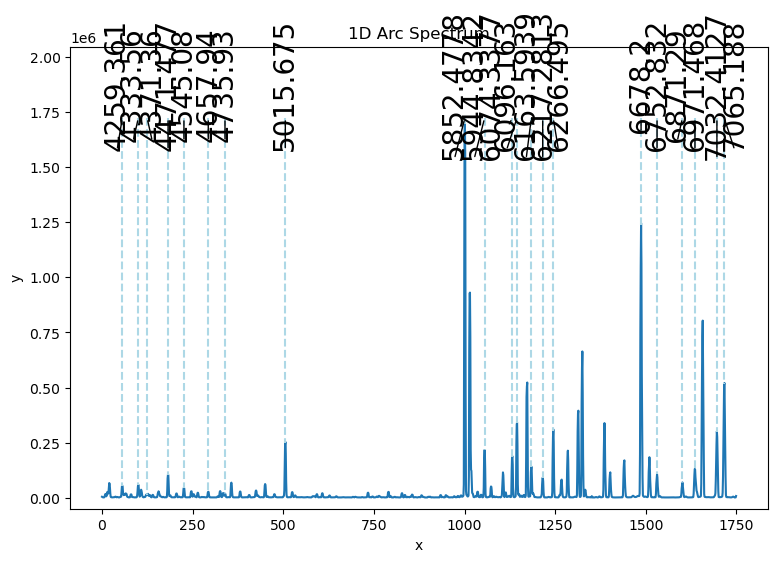

In [13]:
pix_refined = obs.get_centroid_locations(pix, arc_spectrum)                      

wav_labels = []

for wav_element in wav:
    wav_string = str(wav_element)
    wav_labels.append(wav_string)

print(wav_labels)

x_label = "x"
y_label = "y"
title = "1D Arc Spectrum"

#The following line will plot the arc spectrum and highlight the peaks that you have selected and the associated wavelengths
obs.plot_lines(arc_spectrum, pix_refined, wav_labels,
               x_label, y_label, title)

We can now calculate the transformation needed to convert our pixel coordinates to wavelengths.
The commands below will fit a polynomial fuction to `wav` as a function of `pix_refined`, and evaluate this function for every pixel along our x-axis (given by `pix_axis`), creating the corresponding array `wav_axis`. It will generate a plot of the residuals of the fit (the difference between the wavelengths you provided and the fitted wavelengths for each peak). Make sure that the residuals are all within 1Å. if not, make sure you have entered the correct pixels or wavelengths for the lines in question, or just replace these data points with different lines, then run the calibration again. Make a note of the RMS of the fit.

RMS:  8.38045021902412  Angstroms


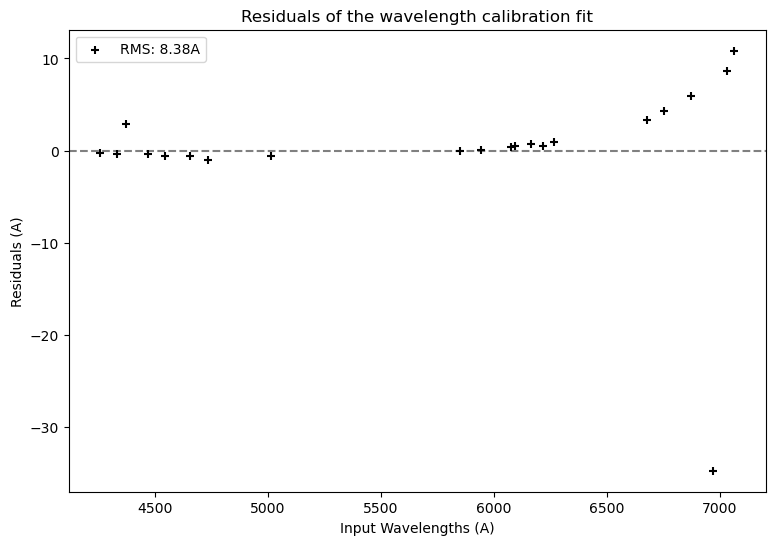

In [14]:
pix_axis = np.arange(0, len(arc_spectrum))

wav_axis = obs.calibration(pix_refined, wav, pix_axis)

You can now view your final wavelength calibrated spectrum: 

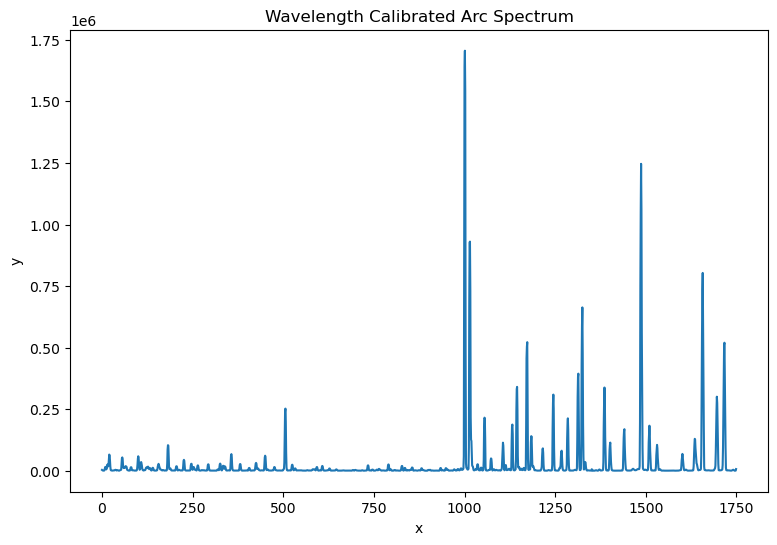

In [15]:
plt.figure(figsize=(9,6))
plt.plot(pix_axis, arc_spectrum)
plt.title("Wavelength Calibrated Arc Spectrum")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Redshift Determination

The spectrum of the quasar displays multiple emission lines. Measure the wavelengths of any obvious emission lines in the quasar spectrum. You can do this manually or use the cell below which will launch an interactive window allowing you to click on the emission lines (this will place a marker at each click location). Then, run the next cell to print the wavelengths corresponding to your clicks.

**Troubleshooting:** Right-click to delete the closest marker.
Clicking will *not* place a marker if the zoom or pan tools are selected. Ignore any error message about deprecated commands.

**Warning:** If you run the following block again it will delete your previous clicks. Watch out for false emission lines if the background was not properly subtracted. 

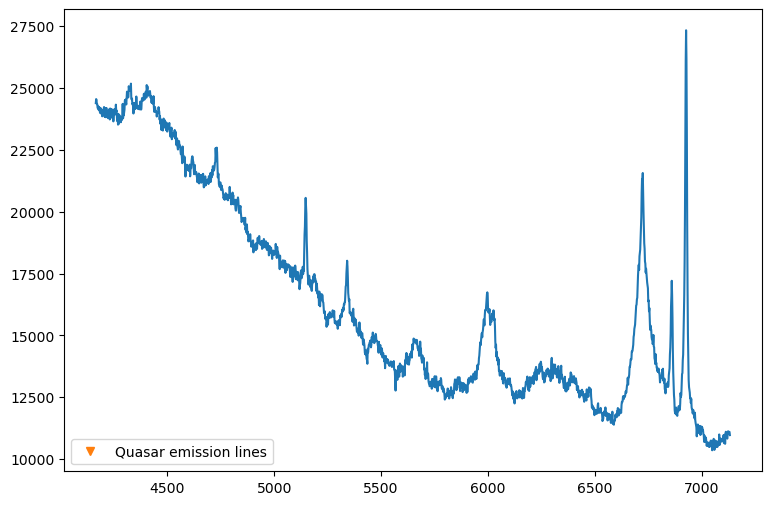

In [16]:
# Launch the interactive window to measure the locations of peaks
# (Ignore any error message about deprecated commands)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(wav_axis,quasar_spectrum)
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")


klicker = obs.clicker(ax, ['Quasar emission lines'], markers=['v'])
ax.legend(loc=3)
plt.show()

In [17]:
# Retrieve the wavelengths of your clicks
peaks = klicker.get_positions()['Quasar emission lines']
peaks = peaks[:,0]
print(peaks, "Angstroms")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Now follow the instructions in the lab manual to determine the redshift of the quasar.